In [2]:
!mkdir -p ~p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:48<00:00, 23.0MB/s]
100% 1.06G/1.06G [00:48<00:00, 23.6MB/s]


In [4]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [6]:
#generators
train_ds = keras.utils.image_dataset_from_directory (
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)

)

Found 20000 files belonging to 2 classes.


In [7]:
validation_ds = keras.utils.image_dataset_from_directory (
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)

)

Found 20000 files belonging to 2 classes.


In [8]:
#normalize
def process(image,label):
  image=tf.cast(image/255,tf.float32)
  return image,label

In [9]:
train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [10]:
#creating model
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

In [11]:
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

In [12]:
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

In [13]:
model.add(Flatten())

In [14]:
model.add(Dense(128,activation='relu'))

In [15]:
model.add(Dense(64,activation='relu'))

In [16]:
model.add(Dense(1,activation='sigmoid'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [18]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [21]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 81s 129ms/step - loss: 0.0295 - accuracy: 0.9915 - val_loss: 0.0515 - val_accuracy: 0.9839
Epoch 2/10
625/625 [==============================] - 80s 128ms/step - loss: 0.0154 - accuracy: 0.9954 - val_loss: 0.0652 - val_accuracy: 0.9807
Epoch 3/10
625/625 [==============================] - 81s 128ms/step - loss: 0.0243 - accuracy: 0.9925 - val_loss: 0.0656 - val_accuracy: 0.9817
Epoch 4/10
625/625 [==============================] - 82s 130ms/step - loss: 0.0165 - accuracy: 0.9955 - val_loss: 0.0295 - val_accuracy: 0.9908
Epoch 5/10
625/625 [==============================] - 80s 128ms/step - loss: 0.0147 - accuracy: 0.9955 - val_loss: 0.0602 - val_accuracy: 0.9833
Epoch 6/10
625/625 [==============================] - 81s 130ms/step - loss: 0.0209 - accuracy: 0.9936 - val_loss: 0.0321 - val_accuracy: 0.9900
Epoch 7/10
625/625 [==============================] - 81s 129ms/step - loss: 0.0089 - accuracy: 0.9973 - val_loss: 0.0210 - val_ac

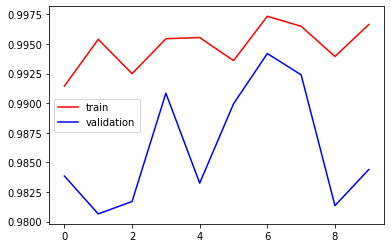

In [22]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [23]:
import cv2

In [28]:
test_img=cv2.imread('/content/dog.jpeg')

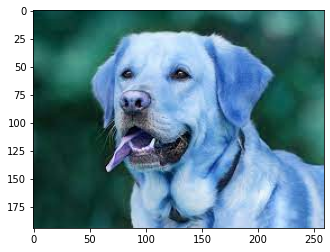

In [29]:
plt.imshow(test_img)

In [30]:
test_img.shape

(194, 259, 3)

In [31]:
test_img=cv2.resize(test_img,(256,256))

In [32]:
test_input=test_img.reshape((1,256,256,3))

In [33]:
model.predict(test_input)

1/1 [==============================] - 0s 226ms/step


array([[1.]], dtype=float32)

In [35]:
test=cv2.imread('/content/cat.jpeg')

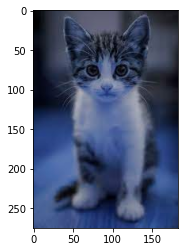

In [37]:
plt.imshow(test)

In [40]:
testi=cv2.resize(test,(256,256))

In [41]:
testi=test.reshape((1,256,256,3))

In [43]:
model.predict(testi)

1/1 [==============================] - 0s 22ms/step


array([[0.]], dtype=float32)